In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
df = pd.read_csv("HealthCareData.csv")
df.columns = df.columns.str.strip()
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [3]:
print(df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].value_counts())
print(df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].unique())

Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    876
no      20
Name: count, dtype: int64
['YES' nan 'no']


In [4]:
df.shape

(950, 42)

In [5]:
df.columns

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%)', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abd

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S.NO                                                                     950 non-null    int64  
 1   Age                                                                      950 non-null    int64  
 2   Gender                                                                   950 non-null    object 
 3   Place(location where the patient lives)                                  816 non-null    object 
 4   Duration of alcohol consumption(years)                                   950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)                           950 non-null    int64  
 6   Type of alcohol consumed                                                 9

In [7]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


In [8]:
df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [9]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [10]:
# Remove missing target values
target_col = 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'
df = df[~df[target_col].isna()]

# Standardize class labels
df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'] = (
    df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)']
    .str.strip()
    .str.upper()
)

In [11]:
# Fill numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns (except target) with mode
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col != target_col]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.isnull().sum()

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

In [13]:
print(df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].value_counts())
print(df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].unique())

Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    876
NO      20
Name: count, dtype: int64
['YES' 'NO']


In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')


In [15]:
num_cols = df.select_dtypes(include='number').columns.tolist()  
num_cols

['S.NO',
 'Age',
 'Duration of alcohol consumption(years)',
 'Quantity of alcohol consumption (quarters/day)',
 'TCH',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'RBC  (million cells/microliter)',
 'MCV   (femtoliters/cell)',
 'MCH  (picograms/cell)',
 'MCHC  (grams/deciliter)',
 'Total Count',
 'Polymorphs  (%)',
 'Lymphocytes  (%)',
 'Monocytes   (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Platelet Count  (lakhs/mm)',
 'Direct    (mg/dl)',
 'Indirect     (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'Globulin  (g/dl)',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)',
 'SGPT/ALT (U/L)']

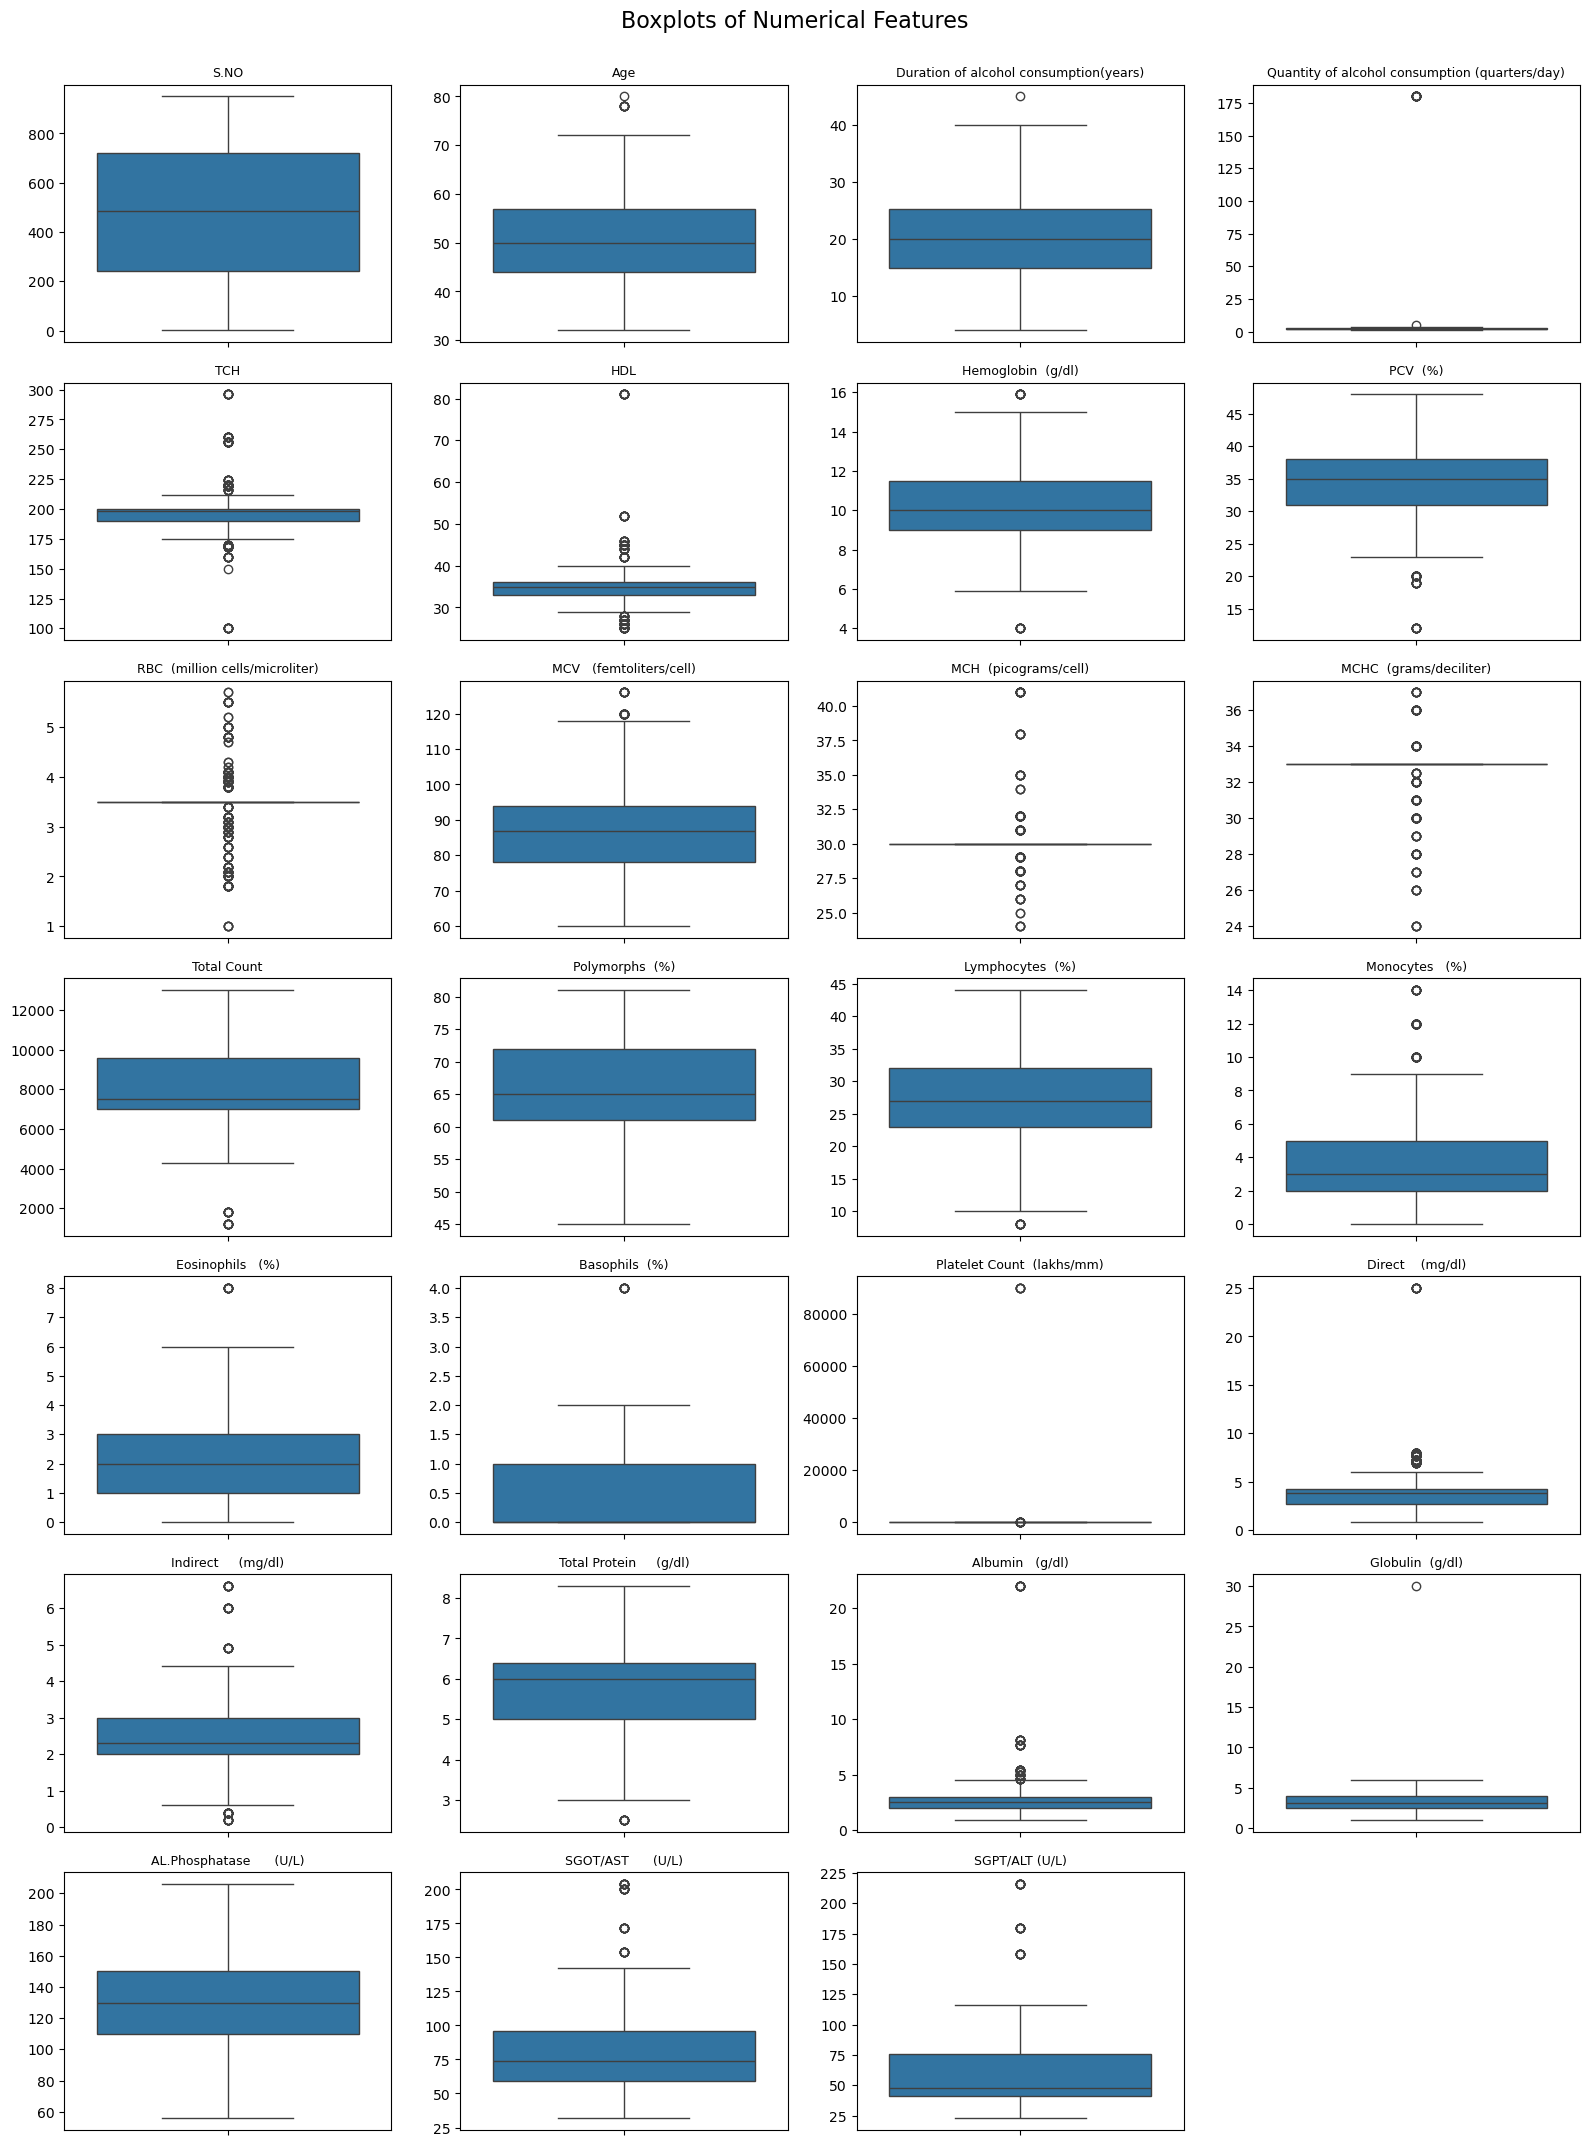

In [16]:
# num_cols already contains your numerical columns
n_cols = 4  # Number of plots per row
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=9)
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", y=1.02, fontsize=16)
plt.show()

S.NO - Lower Bound: -478.50, Upper Bound: 1439.50
Age - Lower Bound: 24.50, Upper Bound: 76.50
Duration of alcohol consumption(years) - Lower Bound: -0.38, Upper Bound: 40.62
Quantity of alcohol consumption (quarters/day) - Lower Bound: 0.50, Upper Bound: 4.50
TCH - Lower Bound: 175.00, Upper Bound: 215.00
HDL - Lower Bound: 28.50, Upper Bound: 40.50
Hemoglobin  (g/dl) - Lower Bound: 5.25, Upper Bound: 15.25
PCV  (%) - Lower Bound: 20.50, Upper Bound: 48.50
RBC  (million cells/microliter) - Lower Bound: 3.50, Upper Bound: 3.50
MCV   (femtoliters/cell) - Lower Bound: 54.00, Upper Bound: 118.00
MCH  (picograms/cell) - Lower Bound: 30.00, Upper Bound: 30.00
MCHC  (grams/deciliter) - Lower Bound: 33.00, Upper Bound: 33.00
Total Count - Lower Bound: 3100.00, Upper Bound: 13500.00
Polymorphs  (%) - Lower Bound: 44.50, Upper Bound: 88.50
Lymphocytes  (%) - Lower Bound: 9.50, Upper Bound: 45.50
Monocytes   (%) - Lower Bound: -2.50, Upper Bound: 9.50
Eosinophils   (%) - Lower Bound: -2.00, Uppe

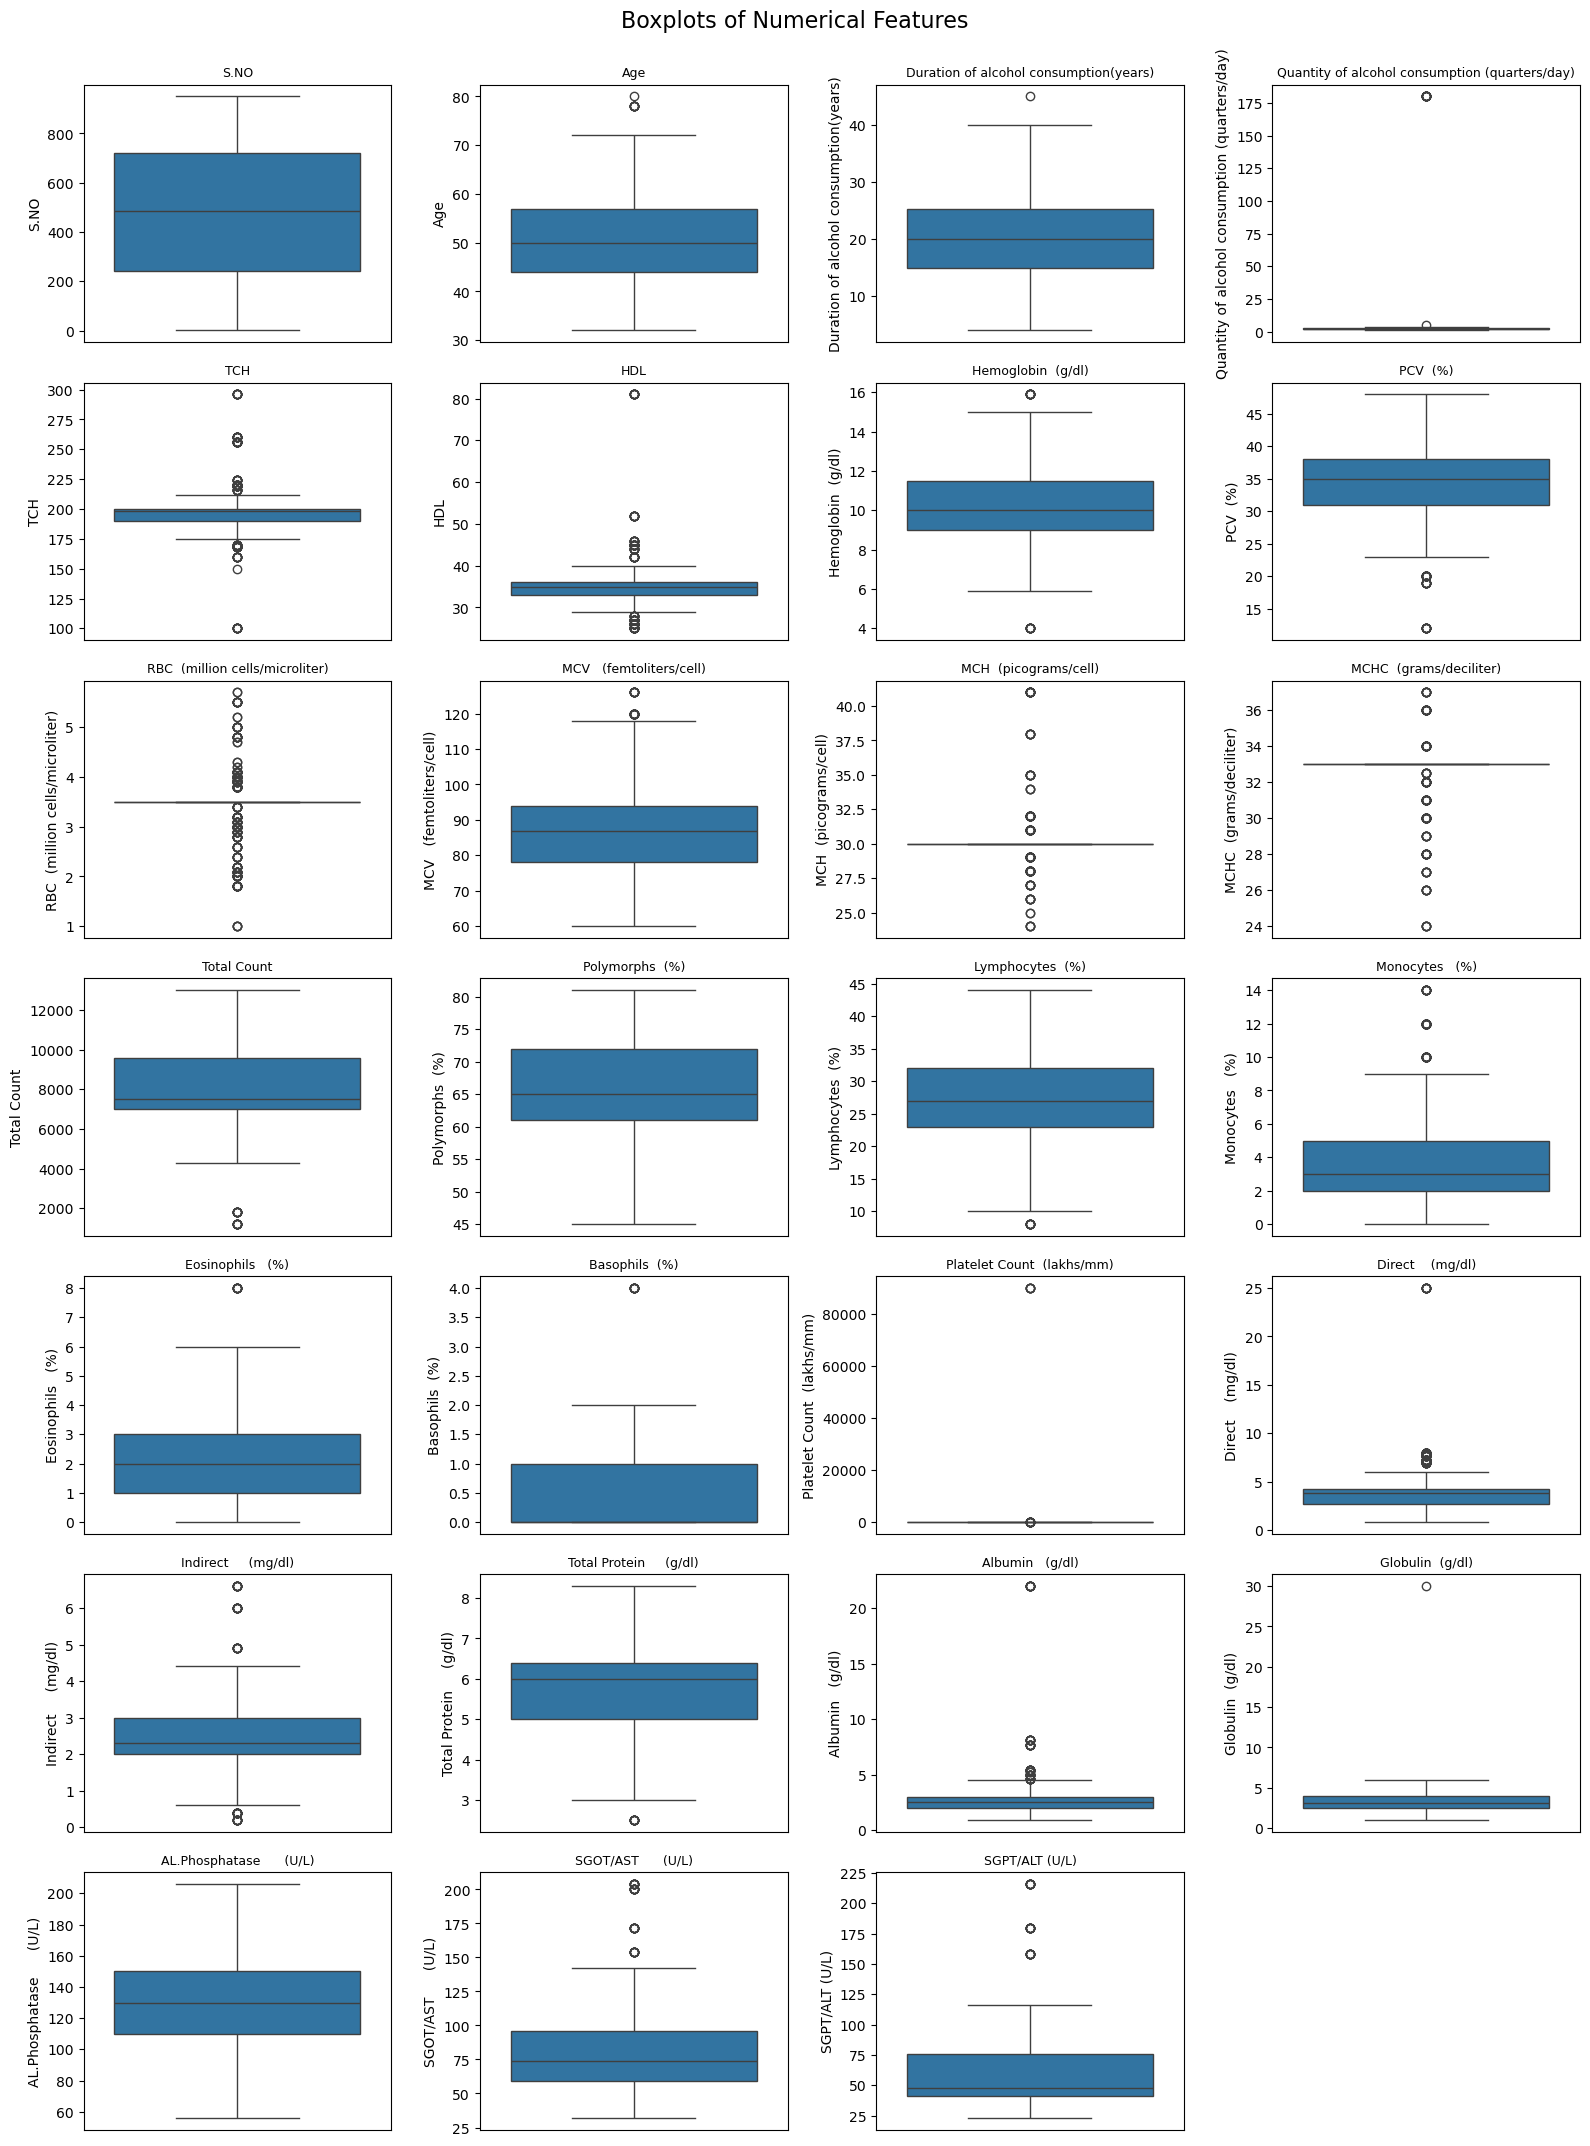

In [17]:
import matplotlib.pyplot as plt

# Number of plots per row
n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, col in enumerate(num_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col} - Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=9)
    plt.xticks([])

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", y=1.02, fontsize=16)
plt.show()

In [18]:
# 1. Split your data
target_col = 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'
X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Get numerical columns
num_cols = X_train.select_dtypes(include='number').columns.tolist()



In [19]:
# Combine X_train and y_train for easier filtering
train = X_train.copy()
train[target_col] = y_train.values

# Separate YES and NO samples
train_yes = train[train[target_col] == 'YES']
train_no = train[train[target_col] == 'NO']

# Remove outliers only from YES samples
for col in num_cols:
    Q1 = train_yes[col].quantile(0.25)
    Q3 = train_yes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train_yes = train_yes[(train_yes[col] >= lower) & (train_yes[col] <= upper)]

# Combine cleaned YES and all NO samples
train_cleaned = pd.concat([train_yes, train_no])

# Separate features and target again
X_train_out = train_cleaned.drop(columns=[target_col])
y_train_out = train_cleaned[target_col]

# Check class distribution
print("Class distribution in cleaned training set:")
print(y_train_out.value_counts())
print("Class distribution in test set (unchanged):")
print(y_test.value_counts())

Class distribution in cleaned training set:
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    171
NO      16
Name: count, dtype: int64
Class distribution in test set (unchanged):
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)
YES    176
NO       4
Name: count, dtype: int64


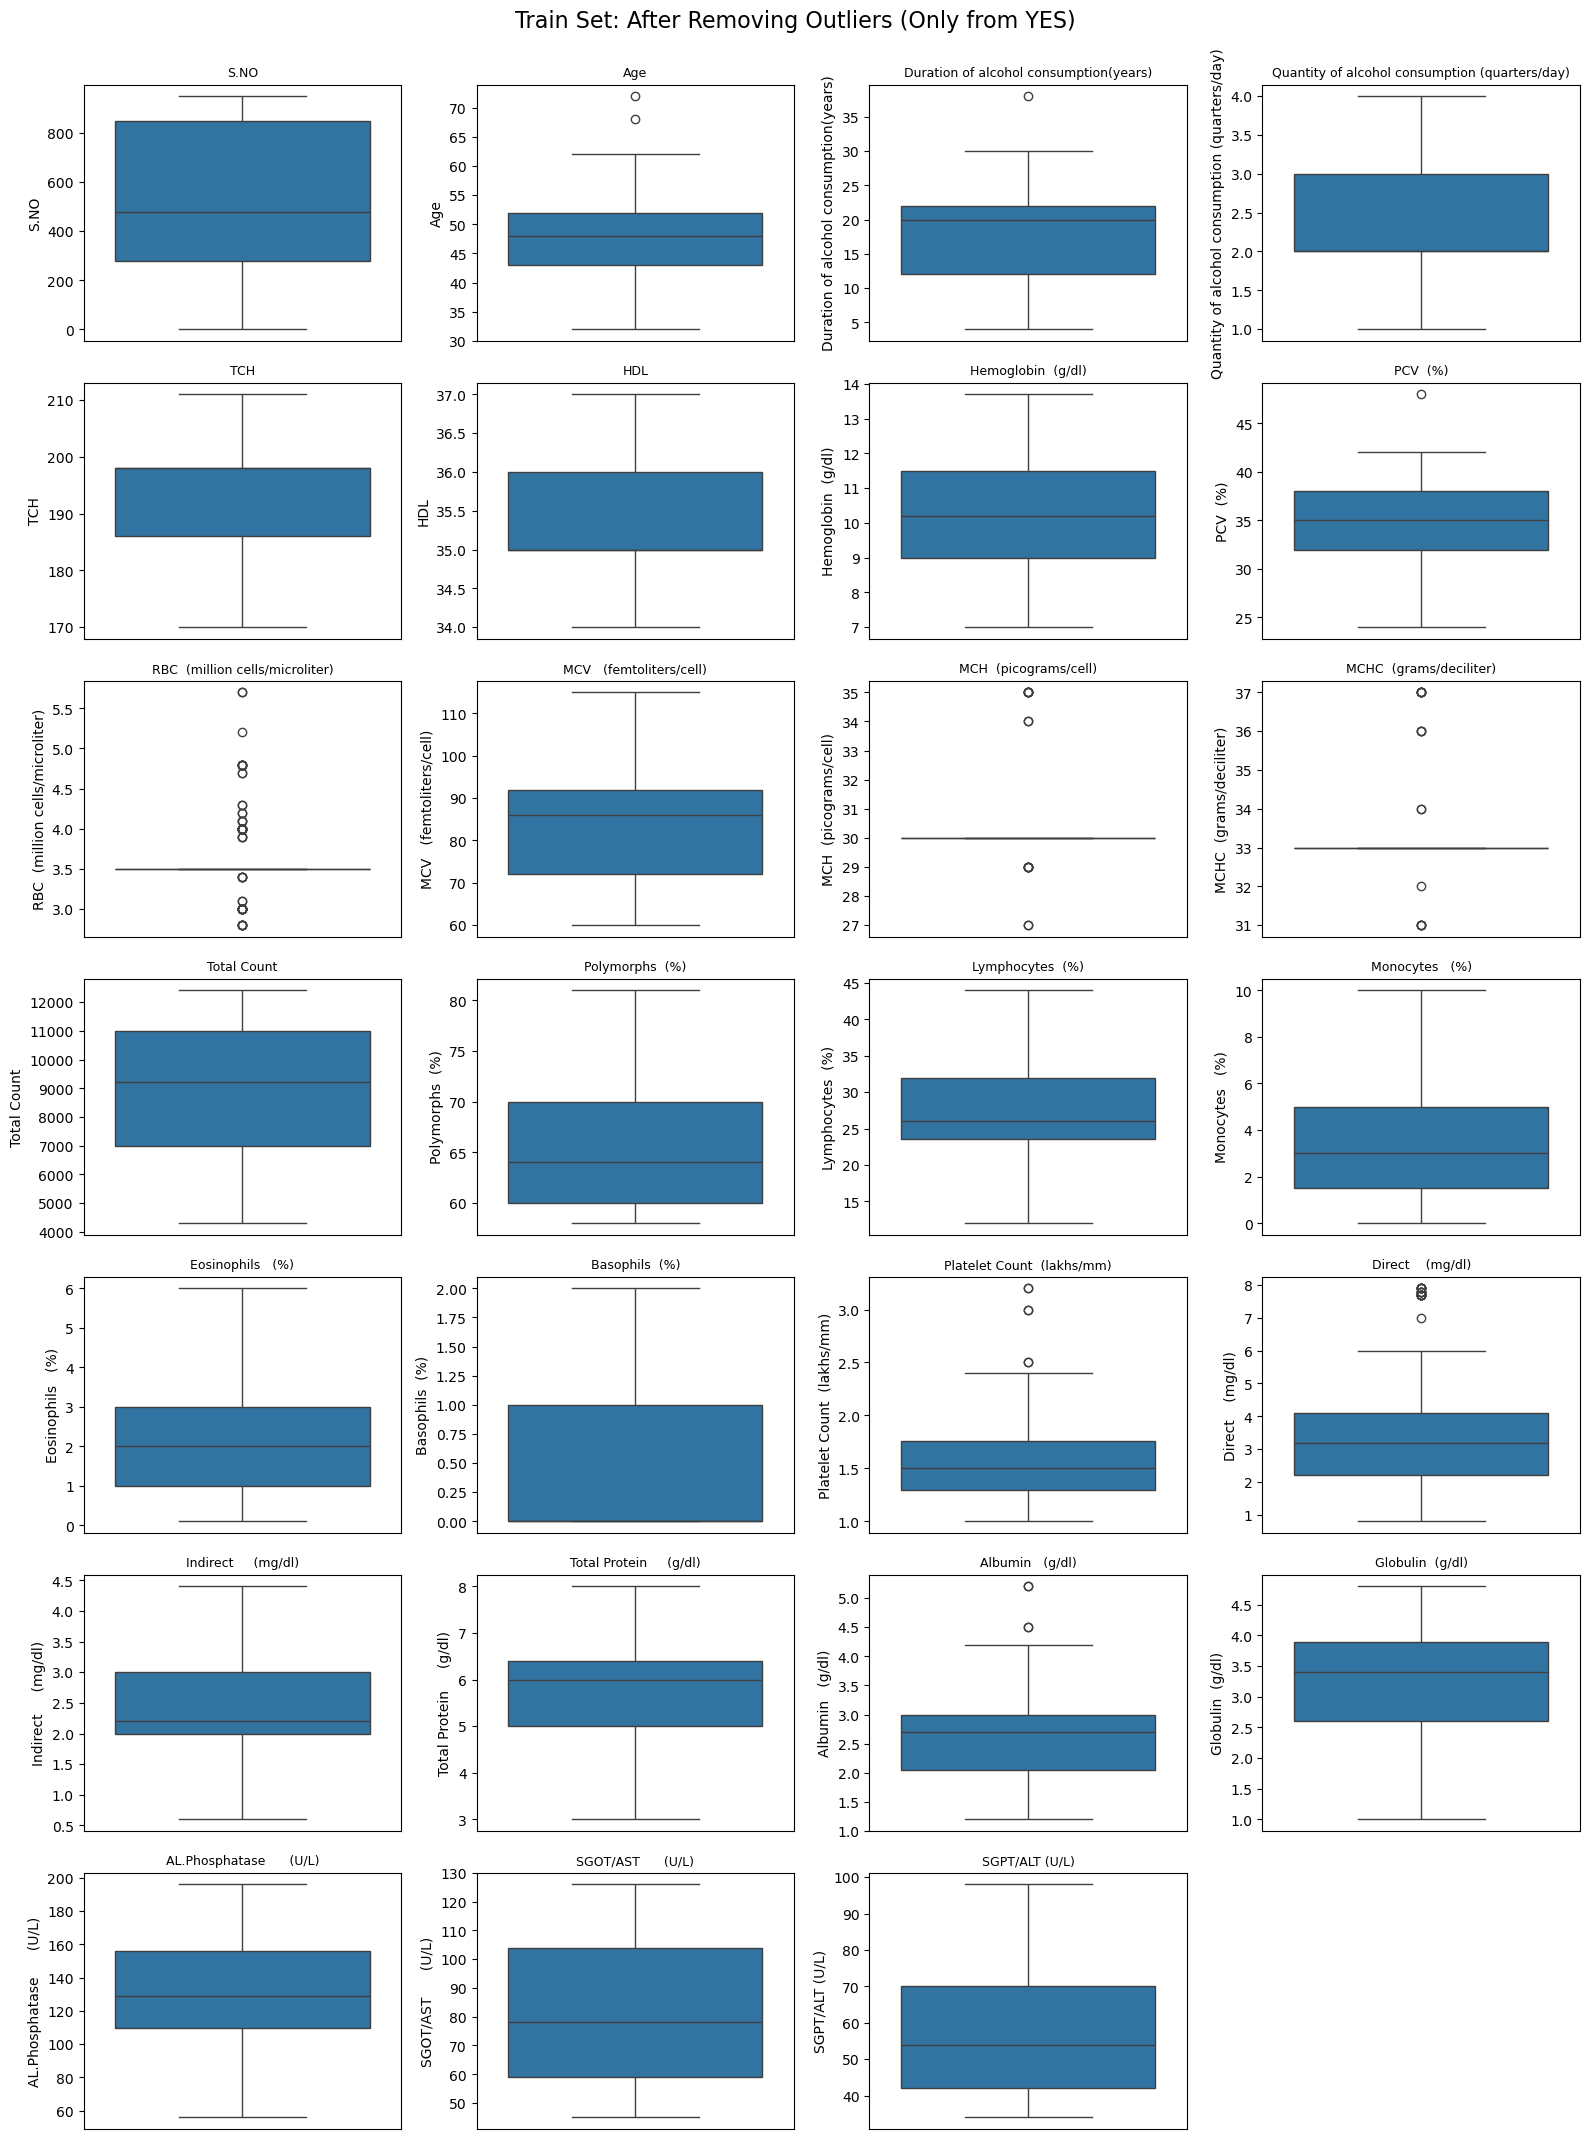

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 4
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=X_train_out[col])
    plt.title(col, fontsize=9)
    plt.xticks([])
plt.tight_layout()
plt.suptitle("Train Set: After Removing Outliers (Only from YES)", y=1.02, fontsize=16)
plt.show()

In [21]:
%matplotlib inline

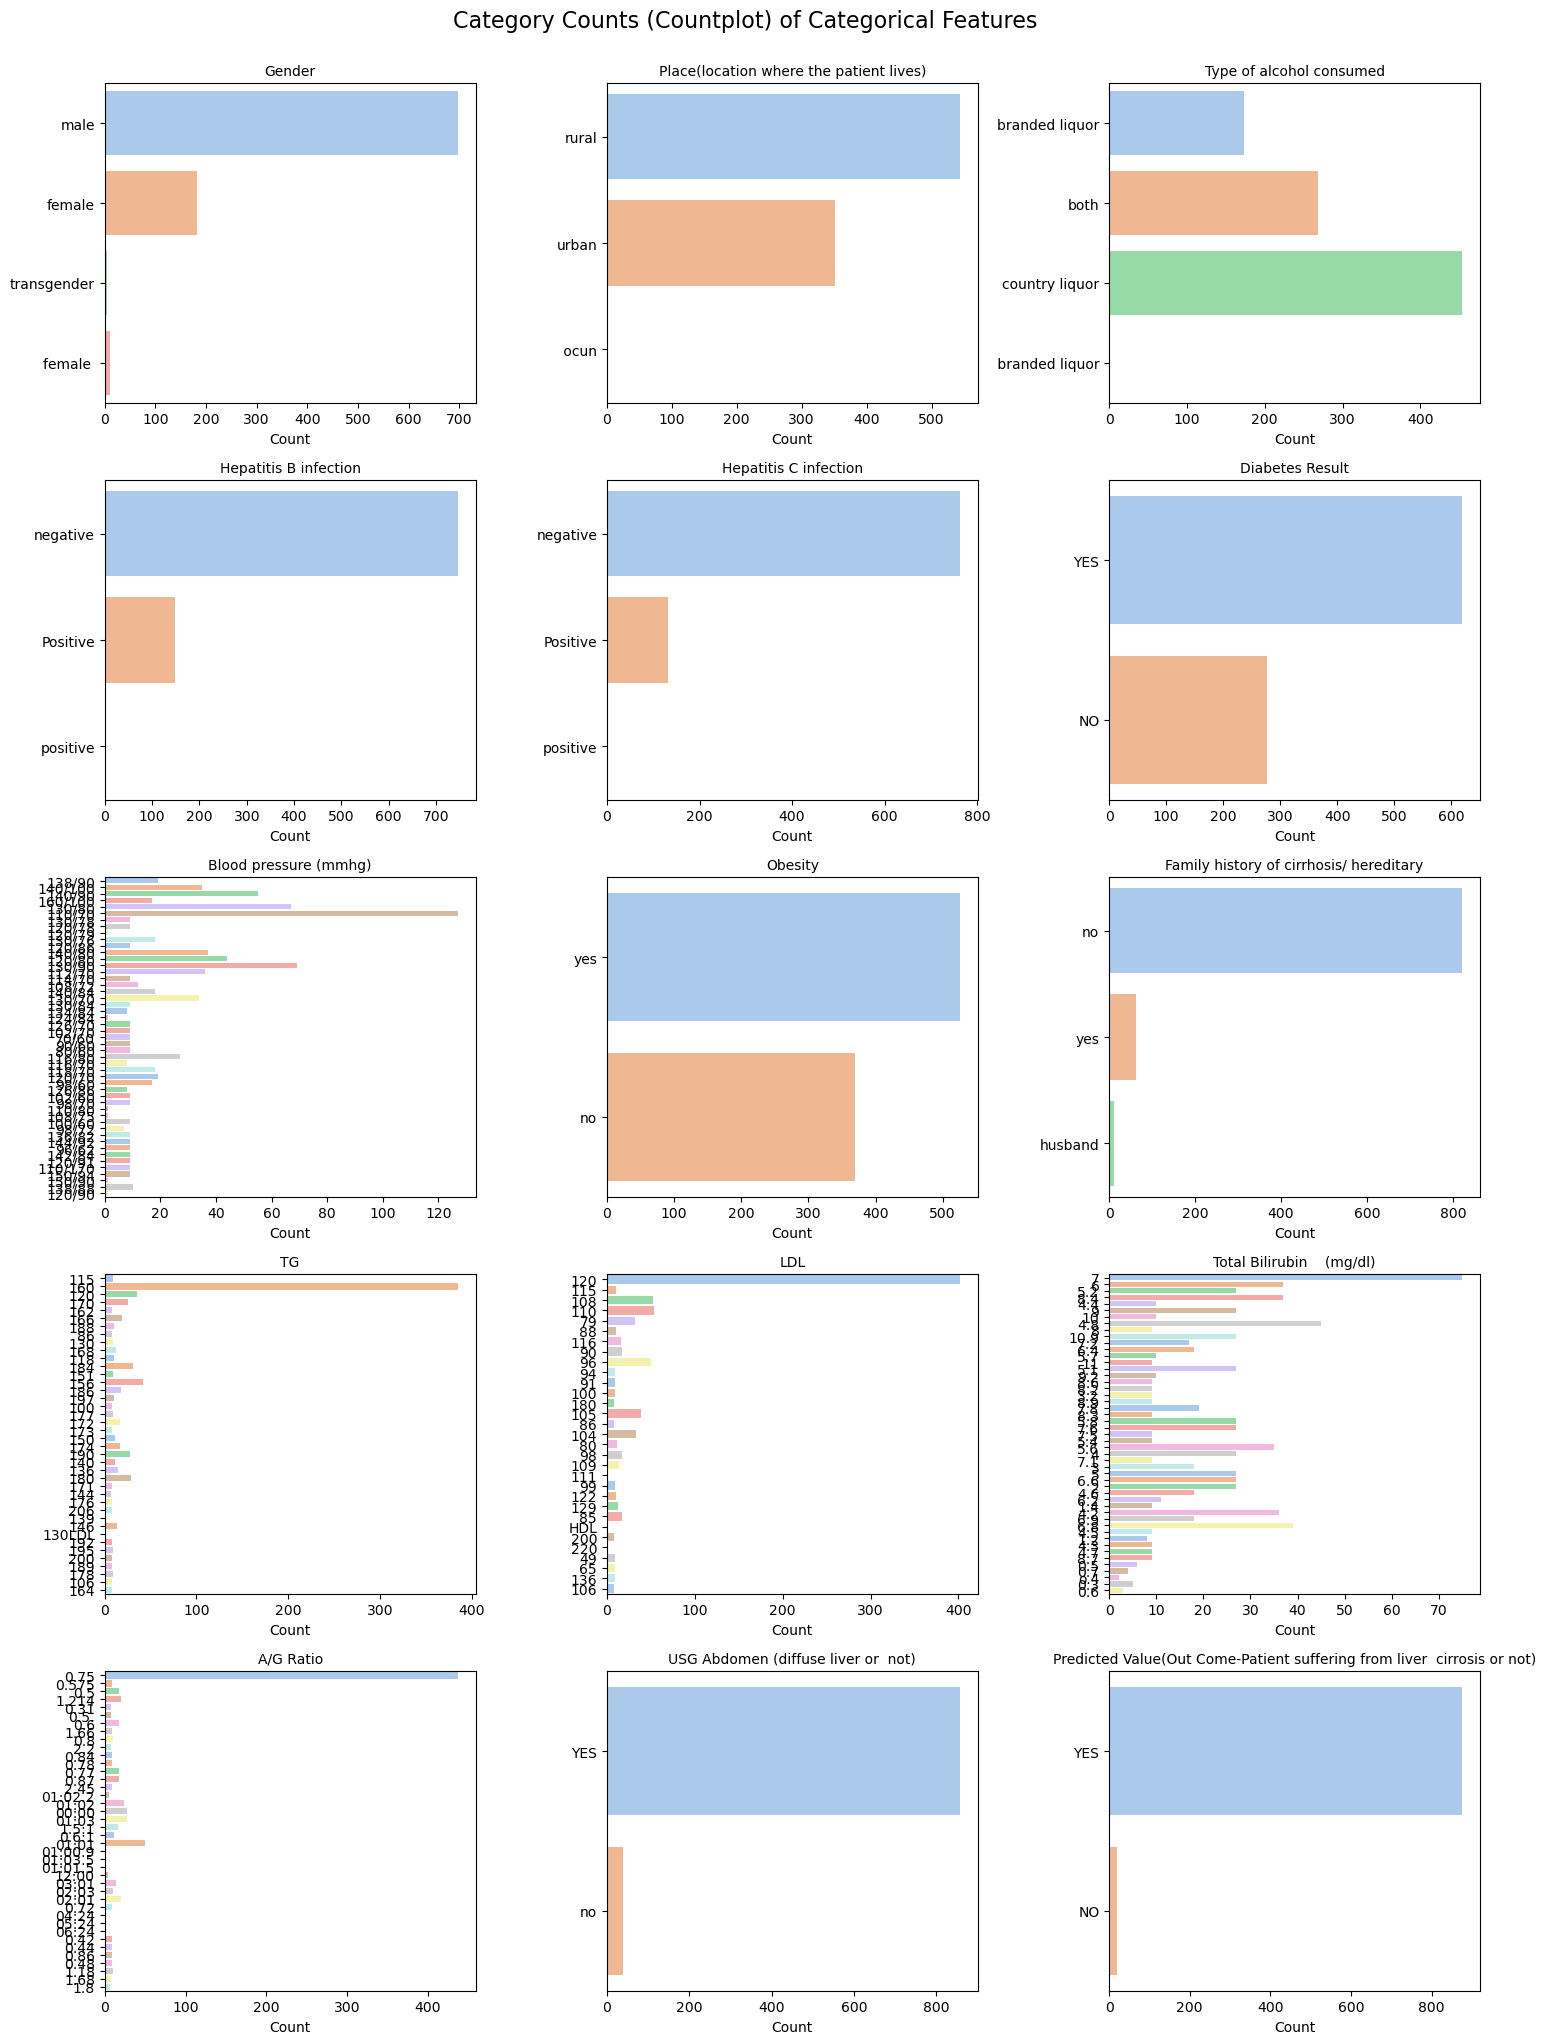

In [22]:
# List of categorical columns (object dtype)
cat_cols = df.select_dtypes(include='object').columns.tolist()

n_cols = 3  # Number of plots per row (adjust as needed)
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df[col], hue=df[col], palette='pastel', legend=False)
    plt.title(col, fontsize=10)
    plt.xlabel("Count")
    plt.ylabel("")
plt.tight_layout()
plt.suptitle("Category Counts (Countplot) of Categorical Features", y=1.02, fontsize=16)
plt.show()

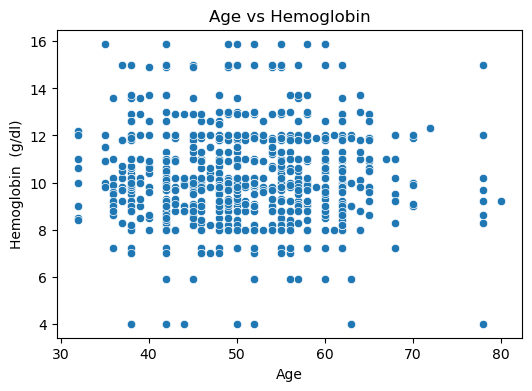

In [23]:
#Bivariate Analysis
#Scatter Plot (Numerical vs. Numerical)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Hemoglobin  (g/dl)'])
plt.title('Age vs Hemoglobin')
plt.xlabel('Age')
plt.ylabel('Hemoglobin  (g/dl)')
plt.show()

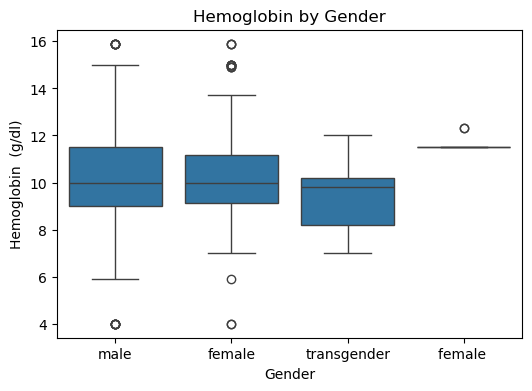

In [24]:
# Box Plot(Categorical vs. Numerical)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Gender'], y=df['Hemoglobin  (g/dl)'])
plt.title('Hemoglobin by Gender')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin  (g/dl)')
plt.show()

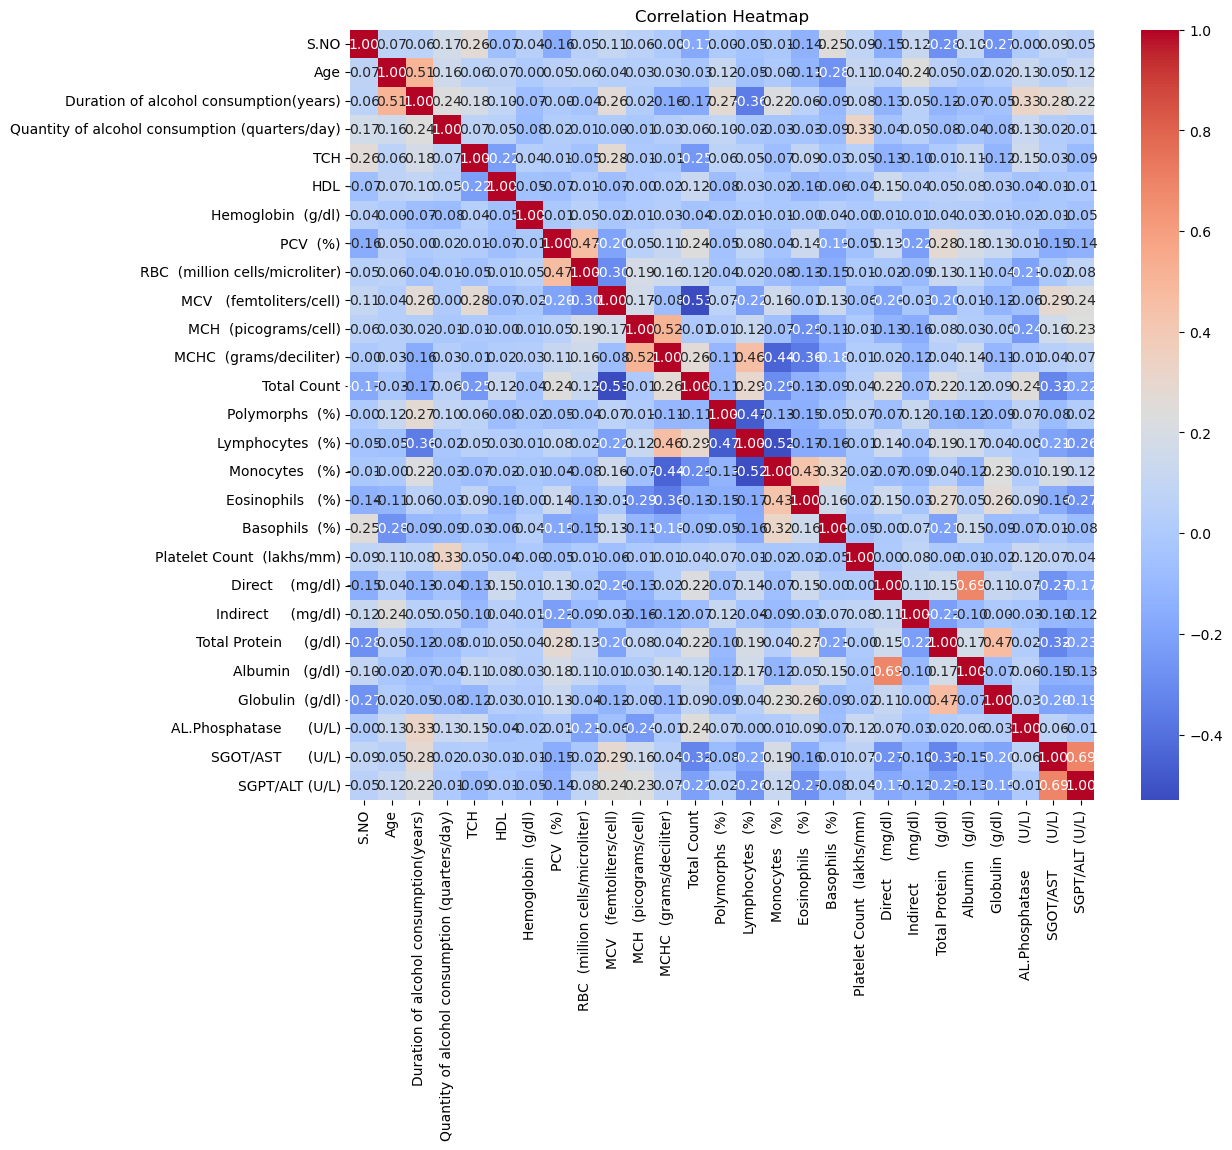

In [25]:
# Multivariate analysis 
# Correlation Heatmap (All  Numerical Features)
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
from sklearn.preprocessing import Normalizer
import pandas as pd

# Optional: Combine train and test to encode consistently
X_full = pd.concat([X_train, X_test], axis=0)

# One-hot encode categorical columns
X_full_encoded = pd.get_dummies(X_full)

# Split back to train and test
X_train_encoded = X_full_encoded.iloc[:len(X_train), :]
X_test_encoded = X_full_encoded.iloc[len(X_train):, :]

# Normalize using L1 norm
normalizer = Normalizer(norm='l1')
X_train_l1 = normalizer.fit_transform(X_train_encoded)
X_test_l1 = normalizer.transform(X_test_encoded)

# Check the result
print(X_train_l1[:5])
print(X_test_l1[:5])

[[1.81946293e-01 1.12737806e-02 5.01056917e-03 ... 0.00000000e+00
  3.13160573e-04 0.00000000e+00]
 [3.83814565e-02 6.52233901e-03 3.51202870e-03 ... 0.00000000e+00
  1.25429596e-04 0.00000000e+00]
 [5.04481477e-04 4.62441354e-03 1.00896295e-03 ... 0.00000000e+00
  8.40802462e-05 0.00000000e+00]
 [1.79133760e-02 7.10848255e-03 2.55905372e-03 ... 0.00000000e+00
  1.42169651e-04 0.00000000e+00]
 [7.23152261e-02 6.83293475e-03 3.41646737e-03 ... 0.00000000e+00
  1.13882246e-04 0.00000000e+00]]
[[1.07527259e-02 7.94766695e-03 4.44134330e-03 ... 0.00000000e+00
  1.16877455e-04 0.00000000e+00]
 [4.54768762e-02 5.73676190e-03 2.08609524e-03 ... 0.00000000e+00
  1.04304762e-04 0.00000000e+00]
 [5.37023526e-02 6.09982179e-03 3.10971307e-03 ... 0.00000000e+00
  1.19604349e-04 0.00000000e+00]
 [6.99388734e-02 8.15953523e-03 4.66259156e-03 ... 0.00000000e+00
  1.16564789e-04 0.00000000e+00]
 [4.62014977e-03 4.43534378e-03 1.29364193e-03 ... 0.00000000e+00
  9.24029953e-05 0.00000000e+00]]


In [27]:
# 1. Identify categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# 2. One-hot encode
X_all = pd.concat([X_train, X_test], axis=0)
X_all_encoded = pd.get_dummies(X_all, columns=cat_cols, drop_first=True)
X_train_encoded = X_all_encoded.iloc[:len(X_train), :].copy()
X_test_encoded = X_all_encoded.iloc[len(X_train):, :].copy()

Categorical columns: ['Gender', 'Place(location where the patient lives)', 'Type of alcohol consumed', 'Hepatitis B infection', 'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)', 'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL', 'Total Bilirubin    (mg/dl)', 'A/G Ratio', 'USG Abdomen (diffuse liver or  not)']


In [28]:
# Map 'NO' to 0, 'YES' to 1
y_train_num = y_train.map({'NO': 0, 'YES': 1})
y_test_num = y_test.map({'NO': 0, 'YES': 1})

In [29]:

def models_eval_mm(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Logistic Regression CV': LogisticRegressionCV(max_iter=1000),
        'Ridge Classifier': RidgeClassifier(),
        'KNN Classifier': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss',verbosity=0)
    }
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_score = accuracy_score(y_train, y_train_pred)
        test_score = accuracy_score(y_test, y_test_pred)
        
        results[name] = {'train_score': train_score, 'test_score': test_score}
        print(f"{name}: Train Accuracy = {train_score:.3f}, Test Accuracy = {test_score:.3f}")
    
    return results

# Call the function with your training and test data
results = results = models_eval_mm(X_train_encoded, y_train_num, X_test_encoded, y_test_num)

Logistic Regression: Train Accuracy = 1.000, Test Accuracy = 1.000
Logistic Regression CV: Train Accuracy = 1.000, Test Accuracy = 1.000
Ridge Classifier: Train Accuracy = 1.000, Test Accuracy = 1.000
KNN Classifier: Train Accuracy = 1.000, Test Accuracy = 1.000
Random Forest: Train Accuracy = 1.000, Test Accuracy = 1.000
Naive Bayes: Train Accuracy = 1.000, Test Accuracy = 1.000
XGBoost: Train Accuracy = 1.000, Test Accuracy = 1.000


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# GridSearchCV for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_encoded, y_train_num)

print("Best parameters (Logistic Regression):", grid_lr.best_params_)
print("Best cross-validated score:", grid_lr.best_score_)
print("Test set accuracy:", grid_lr.score(X_test_encoded, y_test_num))

Best parameters (Logistic Regression): {'C': 0.01, 'solver': 'liblinear'}
Best cross-validated score: 1.0
Test set accuracy: 1.0


In [32]:
# GridSearchCV for Random Forest 
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_encoded, y_train_num)

print("Best parameters (Random Forest):", grid_rf.best_params_)
print("Best cross-validated score:", grid_rf.best_score_)
print("Test set accuracy:", grid_rf.score(X_test_encoded, y_test_num))

Best parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated score: 1.0
Test set accuracy: 1.0


In [33]:
# GridSearchCV for XGBoost

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    param_grid_xgb,
    cv=5,
    scoring='accuracy'
)
grid_xgb.fit(X_train_encoded, y_train_num)

print("Best parameters (XGBoost):", grid_xgb.best_params_)
print("Best cross-validated score:", grid_xgb.best_score_)
print("Test set accuracy:", grid_xgb.score(X_test_encoded, y_test_num))

Best parameters (XGBoost): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best cross-validated score: 0.9944250194250195
Test set accuracy: 1.0


In [34]:
# Ridge Classifier(tune alpha)
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

grid_ridge = GridSearchCV(RidgeClassifier(), param_grid_ridge, cv=5, scoring='accuracy')
grid_ridge.fit(X_train_encoded, y_train_num)

print("Best parameters (Ridge):", grid_ridge.best_params_)
print("Best cross-validated score:", grid_ridge.best_score_)
print("Test set accuracy:", grid_ridge.score(X_test_encoded, y_test_num))

Best parameters (Ridge): {'alpha': 0.01}
Best cross-validated score: 0.9986013986013986
Test set accuracy: 1.0


In [35]:
# KNN Classifier(tune n_neighbors)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_encoded, y_train_num)

print("Best parameters (KNN):", grid_knn.best_params_)
print("Best cross-validated score:", grid_knn.best_score_)
print("Test set accuracy:", grid_knn.score(X_test_encoded, y_test_num))

Best parameters (KNN): {'n_neighbors': 3}
Best cross-validated score: 1.0
Test set accuracy: 1.0


In [36]:
# naive_bayes

nb = GaussianNB()
nb.fit(X_train_encoded, y_train_num)
print("Naive Bayes Test set accuracy:", nb.score(X_test_encoded, y_test_num))

Naive Bayes Test set accuracy: 1.0


In [37]:
# Performance Testing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

def performance_report(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    # ROC-AUC (only if binary classification)
    if len(set(y_test)) == 2:
        y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {auc:.3f}")
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"{model_name} ROC Curve")
        plt.show()
    print("\n")

--- Logistic Regression (Tuned) ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


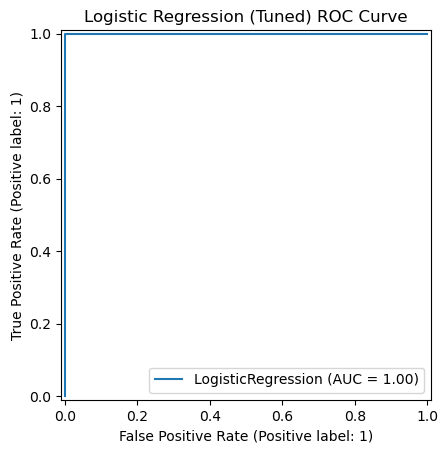



--- Random Forest (Tuned) ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


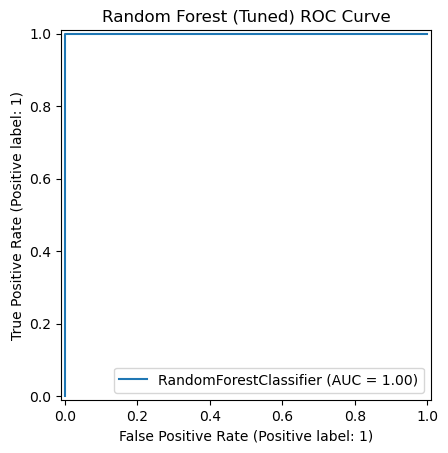



--- XGBoost (Tuned) ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


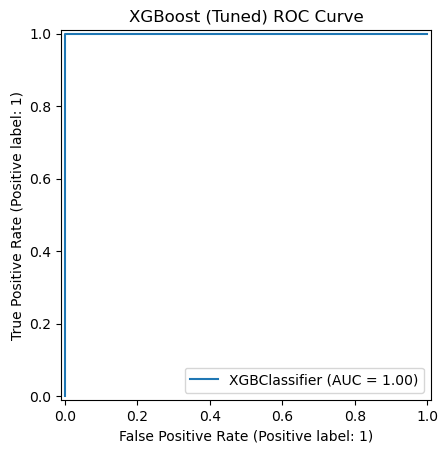



--- Ridge Classifier (Tuned) ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


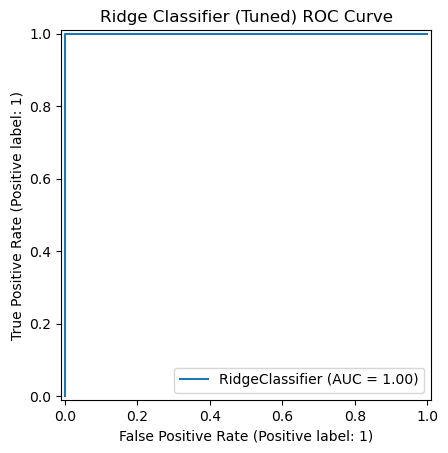



--- KNN (Tuned) ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


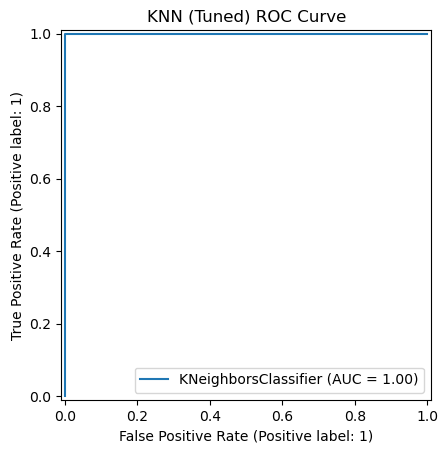



--- Naive Bayes ---
Confusion Matrix:
[[  4   0]
 [  0 176]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00       176

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

ROC-AUC Score: 1.000


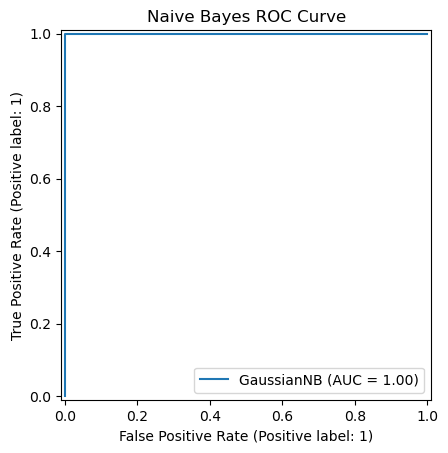

In [38]:
# Now call for each model 

performance_report(grid_lr.best_estimator_, X_test_encoded, y_test_num, model_name="Logistic Regression (Tuned)")
performance_report(grid_rf.best_estimator_, X_test_encoded, y_test_num, model_name="Random Forest (Tuned)")
performance_report(grid_xgb.best_estimator_, X_test_encoded, y_test_num, model_name="XGBoost (Tuned)")
performance_report(grid_ridge.best_estimator_, X_test_encoded, y_test_num, model_name="Ridge Classifier (Tuned)")
performance_report(grid_knn.best_estimator_, X_test_encoded, y_test_num, model_name="KNN (Tuned)")

# For Naive Bayes (no GridSearchCV, just fitted model)
performance_report(nb, X_test_encoded, y_test_num, model_name="Naive Bayes")

In [39]:
import joblib
joblib.dump(grid_xgb.best_estimator_, "best_model_xgboost.pkl")

['best_model_xgboost.pkl']

In [40]:
# Save the list of columns used to train the model
import joblib
joblib.dump(X_train_encoded.columns.tolist(), 'model_features_list.pkl')

['model_features_list.pkl']

In [41]:
# Load the feature list
model_features = joblib.load('model_features_list.pkl')

# Print all column names used for training the model
print(model_features)

['S.NO', 'Age', 'Duration of alcohol consumption(years)', 'Quantity of alcohol consumption (quarters/day)', 'TCH', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%)', 'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)', 'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)', 'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)', 'Gender_female ', 'Gender_male', 'Gender_transgender', 'Place(location where the patient lives)_rural', 'Place(location where the patient lives)_urban', 'Type of alcohol consumed_both', 'Type of alcohol consumed_branded liquor', 'Type of alcohol consumed_country liquor', 'Hepatitis B infection_negative', 'Hepatitis B infection_positive', 'Hepatitis C infection_negative', 'Hepatitis C infection_positiv